<a href="https://colab.research.google.com/github/KhangKagTa19/NLP_Task/blob/main/VietnameseNewsWord2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kết nối Colab với Google Drive để lấy dữ liệu

Cài đặt thư viện Gensim cho việc train model Word2Vec

In [ ]:
!pip install gensim
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.5 MB/s eta 0:00:00


Import các thư viện cần thiết

In [ ]:
import os
import re
import pandas as pd
import string
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from unidecode import unidecode
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load tập dữ liệu từ thư mục trong Google Drive

In [ ]:
# Load data
def load_data(csv_file):
    return pd.read_csv(csv_file, encoding="utf-8")

train_data = load_data('/content/drive/MyDrive/NLP_LogisticClassification/Dataset.csv').iloc[:2000]
corpus = train_data["text"].to_list()
# train_data = "\n".join(train_data)

vietnamese_stopwords = set([
    "là", "và", "của", "có", "được", "không", "cho", "trong", "đến", "từ", "này", "qua", "nếu", "sẽ", "với"
])
stopwords_list = vietnamese_stopwords

def clean_data(text):
    # Lowercase text
    text = text.lower()

    # Remove accents using unidecode
    text = unidecode(text)

    # Remove non-alphabetic characters
    text = re.sub("[^a-zàáạảãăắằẳẵặâấầẩẫậèéẹẻẽêếềểễệđìíịỉĩòóọỏõôốồổỗộơớờởỡợùúụủũưứừửữựỳýỵỷỹ]", " ", text)
    words = text.split()
    clean_words = [word for word in words if (word not in stopwords_list) and len(word) > 2]
    return " ".join(clean_words)


def get_inp(list_sent):
    sent=list(map(clean_data, list_sent))
    sent=list(map(lambda x: x.split(" "), sent))
    return sent

# print(train_data[:1000])
inp_data=get_inp(corpus)
print(inp_data[:5])

[['khi', 'indonesia', 'voi', 'chien', 'thang', 'truoc', 'viet', 'nam', 'giup', 'tang', 'bac', 'len', 'hang', 'the', 'gioi', 'con', 'malaysia', 'sau', 'buoc', 'nhay', 'vot', 'vao', 'thang', 'truoc', 'cung', 'tut', 'bac', 'roi', 'xuong', 'hang', 'that', 'bai', 'asian', 'cup'], ['nhu', 'vay', 'tong', 'cong', 'viet', 'nam', 'tru', 'diem', 'roi', 'hang', 'xuong', 'the', 'gioi', 'bang', 'xep', 'hang', 'fifa', 'duoc', 'cong', 'vao', 'ngay', 'toi', 'day', 'lan', 'dau', 'tien', 'sau', 'nam', 'doi', 'tuyen', 'viet', 'nam', 'rot', 'khoi', 'top', 'cua', 'fifa'], ['den', 'gio', 'nguoi', 'ham', 'bong', 'viet', 'nam', 'van', 'chua', 'hieu', 'tai', 'sao', 'trung', 'thanh', 'binh', 'lai', 'nam', 'keo', 'cau', 'thu', 'indonesia', 'mot', 'cach', 'lieu', 'den', 'vay', 'nhat', 'khi', 'mot', 'tinh', 'huong', 'vong'], ['khong', 'chan', 'hon', 'lam', 'viec', 'song', 'giua', 'nhung', 'nguoi', 'khong', 'thich', 'nhung', 'nguoi', 'khong', 'thich', 'neu', 'biet', 'cach', 'chiem', 'cam', 'tinh', 'cua', 'nguoi', 'k

Train model Word2Vec. Trong quá trình train, có bạn có thể chỉnh sử dụng GPU của Colab để đẩy nhanh tiến độ bằng cách vào Rumtime => Change Runtime Type và chọn GPU

In [ ]:
# Skipgram model
model = Word2Vec(inp_data, min_count=1, vector_size=256, window=5, sg=1)
model.build_vocab(inp_data, update=True)

model.train(inp_data, total_examples=model.corpus_count, epochs=1000)
model.wv.save('word2vec_skipgram.bin')


# CBOW model
model = Word2Vec(inp_data, min_count = 1, vector_size = 256, window = 5, sg = 0)
model.build_vocab(inp_data, update=True)

model.train(inp_data, total_examples=model.corpus_count, epochs=1000)
model.wv.save('word2vec_CBOW.bin')


Sau khi có model. Ta tiến hành load mô hình

In [ ]:
import gensim
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
from scipy.spatial import distance
path = 'word2vec_CBOW.bin'
model = gensim.models.KeyedVectors.load(path)

In [ ]:
from gensim.models import Word2Vec

# Assuming 'model' is your Word2Vec model
with open("vocab.txt", "w", encoding="utf-8") as f:
    for x in model.index_to_key:
        f.write(x + "\n")


Test kết quả

In [ ]:
model.most_similar(positive=['bong'], topn=10)

[('taekwondo', 0.2141534686088562),
 ('truy', 0.20485511422157288),
 ('tigercup', 0.20070958137512207),
 ('stiglitz', 0.19968295097351074),
 ('sleptu', 0.1980839967727661),
 ('methamphetamine', 0.19723166525363922),
 ('huadu', 0.19554388523101807),
 ('klopp', 0.18298999965190887),
 ('clark', 0.1787886917591095),
 ('temasek', 0.17659726738929749)]

In [ ]:
word_0 = "bong"
word_1 = "choi"
word_2 = "liem"

word_0_eb = model[word_0]
word_1_eb = model[word_1]
word_2_eb = model[word_2]

dst_0_1 = distance.euclidean(word_0_eb, word_1_eb)
dst_1_2 = distance.euclidean(word_1_eb, word_2_eb)
dst_2_0 = distance.euclidean(word_2_eb, word_0_eb)

print("OUTPUT DISTANCE")
print("0 vs 1: ", dst_0_1)
print("1 vs 2: ", dst_1_2)
print("2 vs 0: ", dst_2_0)

OUTPUT DISTANCE
0 vs 1:  40.433135986328125
1 vs 2:  55.36733627319336
2 vs 0:  56.07510757446289


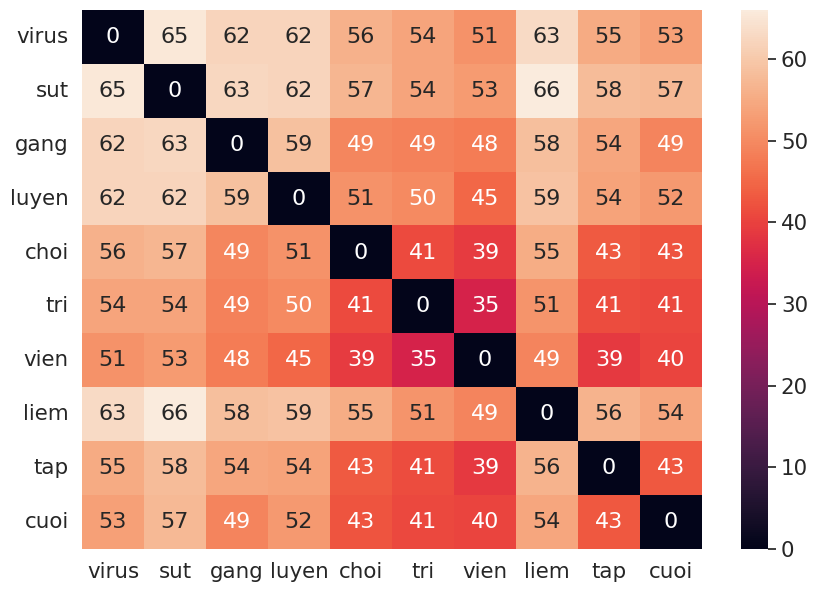

In [ ]:
from scipy.spatial import distance_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

list_words = ["virus", "sut", "gang", "luyen", "choi", "tri", "vien", "liem", "tap", "cuoi"]
list_word_embs = list(map(lambda x: model[x], list_words))

dm = distance_matrix(list_word_embs, list_word_embs, p=2)

df_dm = pd.DataFrame(dm, list_words, list_words)
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_dm, annot=True, annot_kws={"size": 16}) # font size

plt.show()
